# Benchmarcks and plots of SVM RL optim envs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pickle

In [6]:
## All the data stored in the run folder file
run = 'run_10/'
name_dir = 'runs_optim_envs/'+run

## print info of this run
info = pickle.load(open(name_dir+'info.p', 'rb'))
for k in info.keys():
    print(k, ' : ', info[k])

alg  :  PPO
env  :  svmEnv-v2
basis_size  :  250
lambda_gae  :  0.95
gamma  :  0.99
clip  :  0.2
lr_critic  :  0.0003
lr_actor  :  0.0003
num_update  :  10
add_noise_every  :  1


In [10]:
rew = pickle.load(open(name_dir+'rew_0.p', 'rb'))
rew

[[9.951537947815675, 9.805435534787595, 9.442787232102477],
 [9.618096219843451, 9.900009205286494, 9.994304717930985]]

In [7]:
## Example of data stored and number of episodes
rew_files = name_dir+'rew*'
num_ep = len(glob.glob(rew_files))
print('The number of episodes is then:', num_ep)

The number of episodes is then: 3


The max score is at episode 2 and is equal to 29.434804101680953
The min score is at episode 1 and is equal to 29.161340161065567


Text(0.5, 0, 'Episode #')

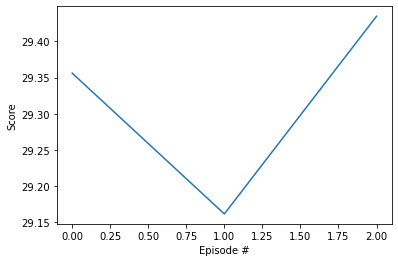

In [11]:
## Score data analysis
scores = np.zeros(num_ep)
for i in range(num_ep):
    rew = pickle.load(open(name_dir+f'rew_{i}.p', 'rb'))
    scores[i] = np.mean([np.sum(ep_rews) for ep_rews in rew])
    
## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

[[9.733948966204604, 9.840344345515867, 9.476931108731122], [9.91941071563149, 9.956683868122232, 9.94228919915659]]
This episode collected a score of =  29.434804101680953


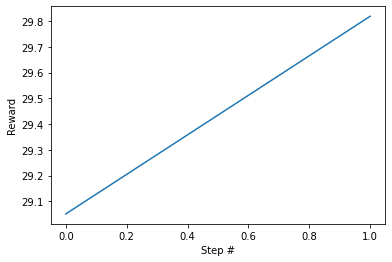

In [24]:
## Rewards of episode with max score
file_rew_max = name_dir+f'rew_{index_max}.p'
rew_max = pickle.load(open(file_rew_max, 'rb'))
print(rew_max)
plt.plot(np.arange(len(rew_max)), [np.sum(ep_rews) for ep_rews in rew_max])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.mean([np.sum(ep_rews) for ep_rews in rew_max]))

tensor([[ 0.0000, -0.1466, -0.1481],
        [ 0.0000, -0.1493, -0.1498]])
The last energy of the episode with max score is =  tensor(-0.1498)


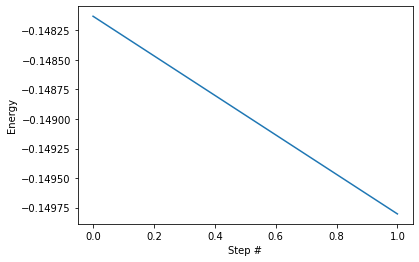

In [19]:
## Plot energies of episode with max score
file_en_max = name_dir+f'en_{index_max}.p'
en_max = pickle.load(open(file_en_max, 'rb'))
print(en_max)
plt.plot(np.arange(len(en_max)), [en_max[i,-1] for i in range(len(en_max))])
plt.ylabel('Energy')
plt.xlabel('Step #')

print('The last energy of the episode with max score is = ', en_max[-1,-1])

[[141 142 138]
 [140 151 142]]
The mean over trajs of last prin dim of the episode with max score is =  144.33333333333334


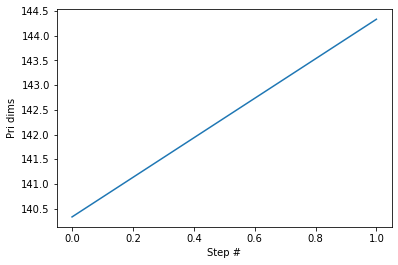

In [23]:
## Plot princip dim of episode with max score
file_pri_max = name_dir+f'pri_dim_{index_max}.p'
pri_max = pickle.load(open(file_pri_max, 'rb'))
print(pri_max)
plt.plot(np.arange(len(pri_max)), [np.mean(pri_max[i]) for i in range (len(pri_max))])
plt.ylabel('Pri dims')
plt.xlabel('Step #')

print('The mean over trajs of last prin dim of the episode with max score is = ', np.mean(pri_max[-1]))

[[191 187 192]
 [189 197 196]]
The mean over trajs of last full dim of the episode with max score is =  194.0


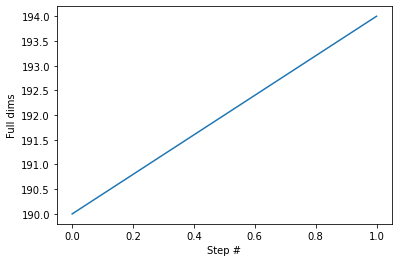

In [25]:
## Plot full dim of episode with max score
file_full_max = name_dir+f'full_dim_{index_max}.p'
full_max = pickle.load(open(file_full_max, 'rb'))
print(full_max)
plt.plot(np.arange(len(full_max)), [np.mean(full_max[i]) for i in range (len(full_max))])
plt.ylabel('Full dims')
plt.xlabel('Step #')

print('The mean over trajs of last full dim of the episode with max score is = ', np.mean(full_max[-1]))

tensor([[ 54.2757,  95.1512,  82.9248],
        [ 52.7584,  39.7793,  57.0688],
        [  0.0000,  29.5153,  20.6805],
        [ 65.8843, 100.0750,  67.0611],
        [ 54.5480,  15.5922,  73.5230],
        [100.9869,  43.3566,   0.0000],
        [ 41.7822,  97.9321,  42.2642],
        [ 61.0263, 110.0000,   7.4990],
        [ 45.0950,  17.6193,  92.4152],
        [ 62.4809,  85.8732,   0.0000],
        [ 22.9497,  64.2447,  17.3762],
        [ 15.3399,  37.7038,   0.0000],
        [ 90.7664,   0.0000,   3.0835],
        [ 18.1106,  62.7300,  60.6002],
        [ 47.6564, 110.0000,  58.9347],
        [ 96.0412, 102.1816,  79.4835],
        [ 82.2533,  60.1848,  34.9793],
        [  7.4269,  39.8910,   8.0974],
        [  8.2046,  55.0373,  67.1077],
        [ 51.0547,  41.1555,   1.8687],
        [ 26.8829,  76.5457,  84.0803],
        [110.0000,  22.3159,  50.6002],
        [ 72.3231, 110.0000,   0.0000],
        [ 84.0673,   6.8447,  58.9435],
        [ 92.1015,  92.9089,  52.5753],


(array([10., 19., 23., 25., 34., 30., 28., 23., 25., 11.,  4.,  9.,  6.,
         1.,  2.]),
 array([   99.856926,  2350.396   ,  4600.935   ,  6851.4736  ,
         9102.013   , 11352.552   , 13603.091   , 15853.63    ,
        18104.168   , 20354.707   , 22605.246   , 24855.785   ,
        27106.324   , 29356.863   , 31607.402   , 33857.94    ],
       dtype=float32),
 <BarContainer object of 15 artists>)

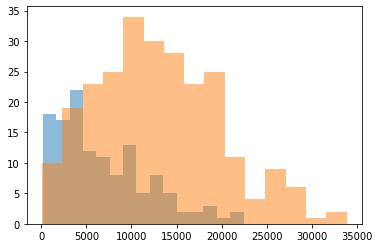

In [47]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)
sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_max = name_dir+f'sigmas_{index_max}.p'
sigmas_rl = pickle.load(open(file_sigmas_max, 'rb'))
sigmas_rl = sigmas_rl * 55.0 + 55.0

sigmas_rl_last = sigmas_rl[-1,-1]
print(sigmas_rl_last)
sigmas_rl_squared = sigmas_rl_last[:,0]**2 + sigmas_rl_last[:,1]**2 + sigmas_rl_last[:,2]**2
sigmas_rl_squared = sigmas_rl_squared.detach().numpy()
plt.hist(sigmas_random_squared, bins=15, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=15, alpha=0.5)

This episode collected a score of =  -9.999271806360472


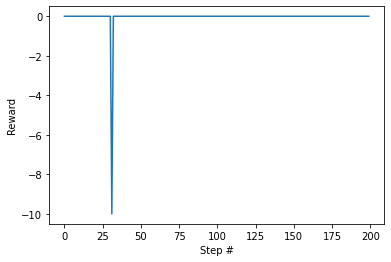

In [53]:
## Rewards of episode with min score
file_rew_min = name_dir+f'rew_{index_min}.p'
rew_min = pickle.load(open(file_rew_min, 'rb'))
plt.plot(np.arange(len(rew_min)), rew_min)
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(rew_min))

The last energy of the episode with min score is =  -0.141206


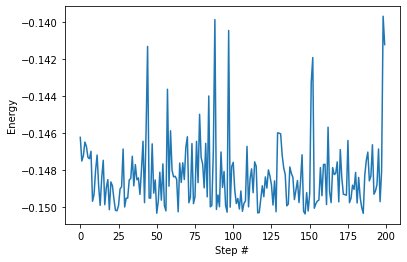

In [56]:
## Plot energies of episode with min score
file_en_min = name_dir+f'en_{index_min}.p'
en_min = pickle.load(open(file_en_min, 'rb'))
plt.plot(np.arange(len(en_min)), en_min)
plt.ylabel('Energy')
plt.xlabel('Step #')

print('The last energy of the episode with min score is = ', en_min[-1])

The last prin dim of the episode with min score is =  103


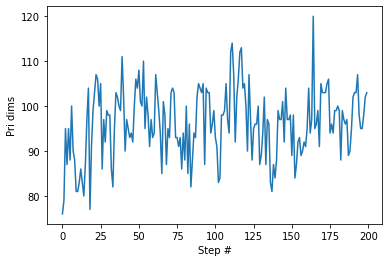

In [57]:
## Plot princip dim of episode with min score

file_pri_min = name_dir+f'pri_dim_{index_min}.p'
pri_min = pickle.load(open(file_pri_min, 'rb'))
plt.plot(np.arange(len(pri_min)), pri_min)
plt.ylabel('Pri dims')
plt.xlabel('Step #')

print('The last prin dim of the episode with min score is = ', pri_min[-1])

The last full dim of the episode with max score is =  103


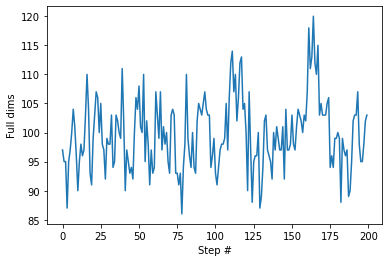

In [58]:
## Plot full dim of episode with min score

file_full_min = name_dir+f'full_dim_{index_min}.p'
full_min = pickle.load(open(file_full_min, 'rb'))
plt.plot(np.arange(len(full_min)), full_min)
plt.ylabel('Full dims')
plt.xlabel('Step #')

print('The last full dim of the episode with max score is = ', full_min[-1])

(array([18., 17., 22., 12., 11.,  8., 13.,  5.,  8.,  5.,  2.,  2.,  3.,
         1.,  2.]),
 array([  168.74501202,  1653.44770316,  3138.15039431,  4622.85308545,
         6107.5557766 ,  7592.25846775,  9076.96115889, 10561.66385004,
        12046.36654118, 13531.06923233, 15015.77192347, 16500.47461462,
        17985.17730576, 19469.87999691, 20954.58268806, 22439.2853792 ]),
 <BarContainer object of 15 artists>)

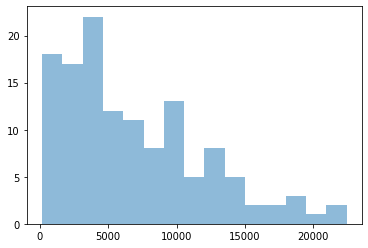

In [23]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_min = name_dir+f'sigmas_{index_min}.p'
sigmas_rl = pickle.load(open(file_sigmas_min, 'rb'))[-1]
sigmas_rl = sigmas_rl * 55.0 + 55.0

sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=15, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)